In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/LCaravaggio/AnalisisPredictivo/master/datos/alturas-pesos.csv')

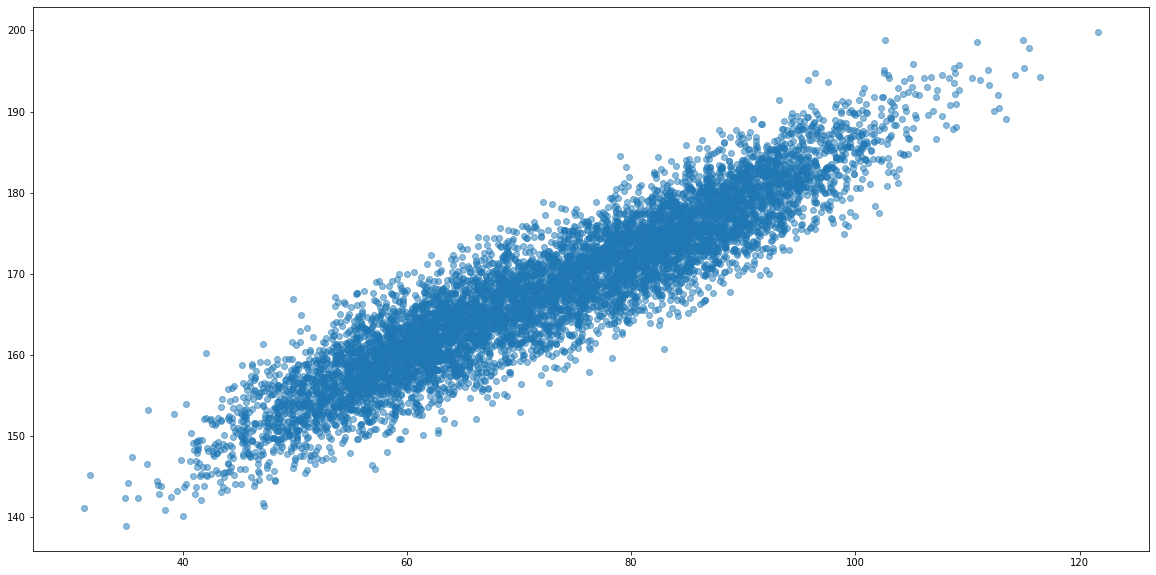

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(df['Peso'], df['Altura'], alpha=0.5)

#Implementar regresión lineal

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
simple = LinearRegression()

In [29]:
simple.fit(df[['Peso']], df['Altura'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
simple.score(df[['Peso']], df['Altura'])

0.8544747680480341

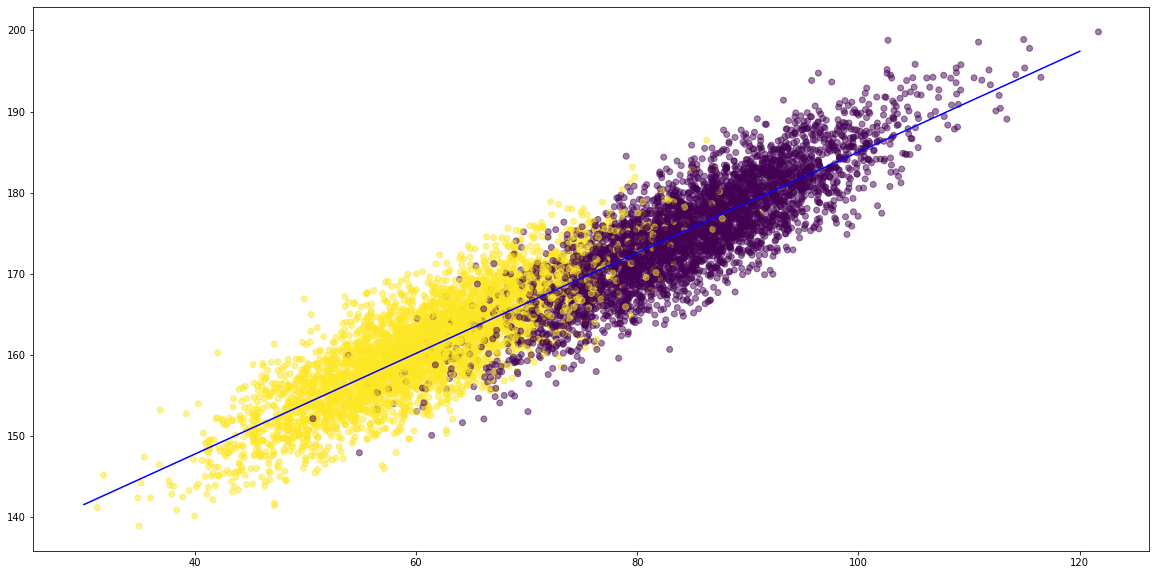

In [53]:
plt.figure(figsize=(20, 10))
plt.scatter(df['Peso'], df['Altura'], c=df['Genero_enc'], alpha=0.5)

p = np.linspace(30, 120, 100)


a = simple.coef_[0]*p + simple.intercept_ 
plt.plot(p, a, c='b')

#Uso de la variable Género

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
le.fit(df['Genero'])

LabelEncoder()

In [33]:
df['Genero_enc'] = le.transform(df['Genero'])

In [34]:
df['PesoxGenero'] = df['Genero_enc'] * df['Peso']

In [35]:
multiple = LinearRegression()
multiple.fit(df[['Genero_enc', 'Peso', 'PesoxGenero']], df['Altura'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
multiple.coef_, multiple.intercept_

(array([ 4.0128233 ,  0.69748132, -0.02224346]), 116.00926819899163)

In [37]:
multiple.score(df[['Genero_enc', 'Peso', 'PesoxGenero']], df['Altura'])

0.8600194948396104

# Split de Datos

In [74]:
from sklearn.model_selection import train_test_split
X=['Genero_enc', 'Peso', 'PesoxGenero']
y=['Altura']
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2)

In [75]:
vars=['Peso']
simple.fit(X_train[vars], y_train)
print(simple.score(X_test[vars], y_test))

simple.fit(X_train, y_train)
print(multiple.score(X_test, y_test))

0.8576137225653615
0.8620849466654832
